In [6]:
#Exercise 11
import numpy as np
import matplotlib.pyplot as plt


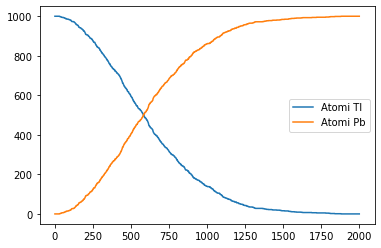

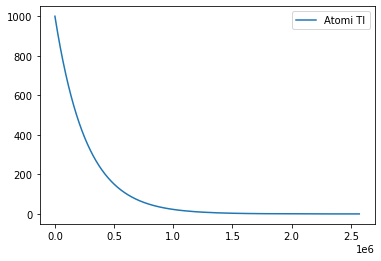

In [22]:
#1. Radioactive decay chain

tau = 3052 * 60  
N = 1000  
tl_atomi = [N]
pb_atomi = [0]

def p(t, tau):
    return 1 - 2**(-t/tau)

N_steps = 2000

for t in range(1, N_steps):

    atomi = np.random.random(tl_atomi[-1])
    
    decayed = np.sum(atomi < p(t, tau)) 
    
    
    tl_atomi.append(tl_atomi[-1] - decayed)
    pb_atomi.append(pb_atomi[-1] + decayed)
    
plt.plot(tl_atomi, label = "Atomi Tl")
plt.plot(pb_atomi, label = "Atomi Pb")
plt.legend()
plt.show()


def inverse_p2(x):
    return -tau*np.log2(1 - x)

un = np.random.random(N_steps)
x = inverse_p2(un)
plt.plot(np.sort(x), (1 - (np.sort(un)))*1000, label = "Atomi Tl")
plt.legend()
plt.show()


The result with Hit/Miss Method : 1.3412
Error:  0.0029672369646212603


The Result With Mean Value Method = 1.3460703650952723
Error: 0.0020681986689592945


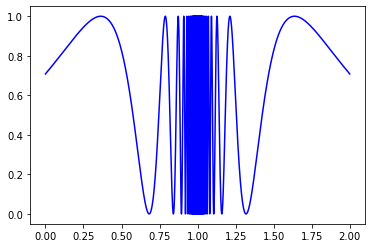

In [26]:
#2. Monte Carlo integration: hit/miss vs mean value method

def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0.00001,1.99999,100000)
plt.plot(x,f(x),color = "blue")
#repeat the process for 99999 times.
N = 99999
count=0
#calculate for N times.
for i in range(N):
    x=2*np.random.random() 
    y=np.random.random()
    if y<f(x): 
        count+=1
        
#calculate the error.
error = (1-(-1))*np.sqrt(N*(count/N)*(1-count/N))/N
print('The result with Hit/Miss Method :', I)
print("Error: ", error)

print("\n")

x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()  
    y[i] = f(x[i])  

# Calculation of the result
I_2 = ((1-(-1))*np.sum(y))/N

first_part = (1/N)*np.sum(y**2)
second_part = (1/N)*np.sum(y)

# Compute the error.
error_mean = ((1-(-1))*np.sqrt((first_part-second_part**2)/N))
    
print('The Result With Mean Value Method =',I_2)
print('Error:',error_mean)

In [27]:
#3. Monte Carlo integration in high dimension

N = 100000

x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

count = 0
for i in range(N):
    if x[i]**2 + y[i]**2 <= 1:
        count += 1

area = 4*count/N
print('Area for the circle for 2 dimension:',area) 

D = 10
x_r = np.random.uniform(-1, 1, (N, D))

count_D = 0
for i in range(N):
    s = 0
    for j in range(D):
        s += x_r[i, j]**2
    if s <= 1:
        count_D += 1

area_D = (2**D*count_D)/N
print('Area for the circle for 10 dimension:',area_D)

Area for the circle for 2 dimension: 3.1378
Area for the circle for 10 dimension: 2.28352


In [28]:
#4. Monte Carlo integration with importance sampling

a=0
b=1
N=1000
first=True

def I(x):
    return (x**(-0.5))/(np.exp(x)+1) # the function
def w(x):
    return 1/(np.sqrt(x))  #the function

for i in range(N):
    r = np.random.uniform(a, b)**2 
    if first:
        func = np.array([I(r)])
        wunc = np.array([w(r)])
        first = False
    else:
        func = np.append(func, I(r))
        wunc = np.append(wunc, w(r))
        

I = 2*sum(func/wunc)/N
print("The result:",I)

The result: 0.8404758335328298
